# 

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
df = pd.read_csv("C:/Users/monaa/Dropbox/Thesis/Primair/KVO_META.csv",
                 encoding='latin-1', index_col=False)


# Checking similarity and variation across the seasons.

In [252]:
recency = df[['Collectie', 'Oorspronkelijke titel']]
recency = recency.set_index('Collectie')

column_name = 'Oorspronkelijke titel'

# create the dictionary
unique_dict = {}
for index, row in recency.iterrows():
    if row[column_name] not in unique_dict.get(index, []):
        unique_dict.setdefault(index, []).append(row[column_name])

print(len(unique_dict))


31


<BarContainer object of 31 artists>

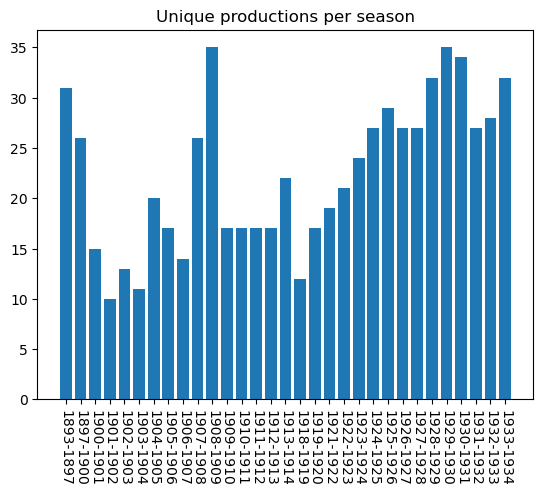

In [253]:
x = []
y = []
for key, values in unique_dict.items():
    x.append(key)
    y.append(len(values))

plt.xticks(rotation=270)
plt.title('Unique productions per season')
plt.bar(x, y)


We know have a dictionary in which the key is the season and the value is a list of all the unique productions that were performed that season. <br>
In the plot above we can see that there is are some differences in the variations of productions.<br>
Now I want to perform a cosine similarity test on the individual lists.
<br>
I expect the similarity scores are very low across consecutive seasons, but relatively similar within the entire oevre. (how can we test this)?

In [254]:
from collections import Counter


def length_similarity(c1, c2):
    lenc1 = sum(c1.values())
    lenc2 = sum(c2.values())
    return min(lenc1, lenc2) / float(max(lenc1, lenc2))


def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)


def similarity_score(l1, l2):
    c1, c2 = Counter(l1), Counter(l2)
    return length_similarity(c1, c2) * counter_cosine_similarity(c1, c2)


counter = 0
output = []

while counter < len(x)-1:
    output.append(similarity_score(x[counter], x[counter+1]))
    counter += 1


Text(0.5, 1.0, 'Similarity score across the seasons')

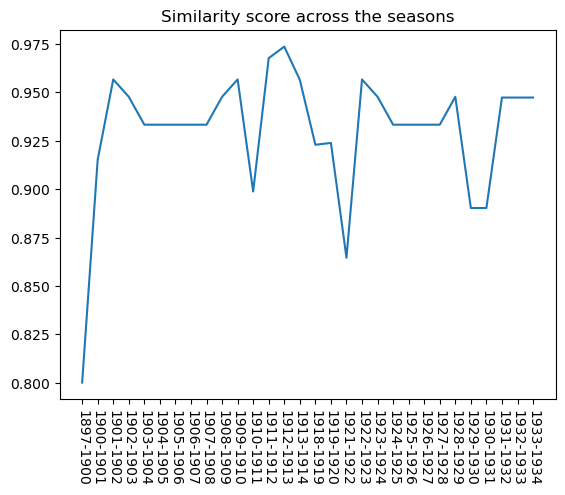

In [255]:
plt.plot(list(unique_dict.keys())[1::], output)
plt.xticks(rotation=270)
#plt.title('Unique productions per season')

plt.title('Similarity score across the seasons')

# Heel lage similatity met 1914 na de heropening, wat te verwachten valt.
#


# Poisson test

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
df = pd.read_csv("C:/Users/monaa/Dropbox/Thesis/Primair/KVO_META.csv",
                 encoding='latin-1', index_col=False)

df.head()
df['Datum'] = pd.to_datetime(df['Datum'], infer_datetime_format=True, errors='coerce')


C:\Users\monaa\AppData\Local\Temp\ipykernel_16188\1884767232.py:9: UserWarning: Parsing '13/02/1923' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Datum'] = pd.to_datetime(df['Datum'], infer_datetime_format=True, errors='coerce')
C:\Users\monaa\AppData\Local\Temp\ipykernel_16188\1884767232.py:9: UserWarning: Parsing '13/01/1900' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Datum'] = pd.to_datetime(df['Datum'], infer_datetime_format=True, errors='coerce')
C:\Users\monaa\AppData\Local\Temp\ipykernel_16188\1884767232.py:9: UserWarning: Parsing '18/01/1900' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Datum'] = pd.to_datetime(df['Datum'], infer_datetime_format=True, errors='coerce')
C:\Users\monaa\AppData\Local\Temp\ipykernel_16188\1884767232.py:9: UserWarning: Parsing '20/01/1900' in DD/MM/YYYY format. Provide fo

In [290]:
value_counts = df['Genormaliseerde titel'].value_counts()
df['frequency'] = df['Genormaliseerde titel'].apply(lambda x: value_counts[x])


In [292]:
table = pd.pivot_table(df, values='Afbeelding', index=['Collectie'], columns=['Genormaliseerde titel'], aggfunc='count')
table.head()

Genormaliseerde titel,'T Minnebrugje,Abu-Hassan,Alpenlied,Anita,Arendsnest,Baldie,Bastien en Bastienne,Bergliot,Bolero,Carmen,...,Winternachtsdroom,Winternachtsdroom,Zampa,ZeeVolk,ZeeVolk,Zigeunerliefde,Zooals Voorheen,Zriny,Zwaargewicht ( of De eer van't Land),concert P. Benoit
Collectie,,,,,,,,,,,,,,,,,,,,,
1893-1897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0
1897-1900,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900-1901,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901-1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902-1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
def first_second(column):   
    #ophalen van de index van de eerste productie
    first_not_nan_idx = table[column].notna().idxmax()
    try:
        # get the index of the second non-NaN value
        second_not_nan_idx = table[column].dropna().index[1]
    except IndexError: #we krijgen een error als de voorstelling slechts in één seizoen werd opgevoerd. in dat geval is eerste ook de tweede index.
        second_not_nan_idx = first_not_nan_idx
    return first_not_nan_idx, second_not_nan_idx

In [294]:
#we passen deze functie toe op alle kolommen (i.e. alle producties in de draaitabel)
#we slaan dit op in een output dictionary waar de titel van de productie de key is een de waarden een tuple (eerste seizoen, tweede seizoen).
output = {}
for col in table.columns:
    output[col] = first_second(col)

#we maken dan een dictionary waar wel telkens het verschil nemen van de grootste getal van de twee seizoen  (in het geval van 1911-1912 zou dat 1912 zijn).
#dit getal slagen we ook op met de productie titels als key en het verschil als value.

verschil = {}

for key, rang in output.items():
    first = int(rang[0][5::])
    second = int(rang[1][5::])
    verschil[key] = second - first

In [298]:
df = df.drop(columns=['Column1', 'Performances_ID','Afbeelding', 'Productie', 'Gelegenheid', 'Multiple bill', 'Oorspronkelijke première', 'Oorspronkelijke titel', 'genre', 'Directie'])

In [296]:
def add_verschil (row):
    for key, values in verschil.items():
        if row == key:
            
            return values
    else:
        return 'N/A'

In [299]:
#we voegen een kolom toe dat aangeeft hoe veel seizoenen later deze productie nog eens opgevoerd werd. 
#Als dit 0 is werd deze productie dus slechts binnen één seizoen opgevoerd.
df['verschil'] = df['Genormaliseerde titel'].apply(add_verschil)
df.head()

,Collectie,Datum,Genormaliseerde titel,Oorspronkelijke taal,Componist,frequency,verschil
0,1893-1897,1893-10-03,De Vrijschutter,DUI,Carl Maria von Weber,63,3
1,1893-1897,1893-10-05,Willem Tell,DUI,Carl Reinecke,2,0
2,1893-1897,1893-10-10,De Vrijschutter,DUI,Carl Maria von Weber,63,3
3,1893-1897,1893-10-12,Willem Tell,DUI,Carl Reinecke,2,0
4,1893-1897,1893-11-16,Charlotte Corday,NL,Peter Benoit,7,4


In [300]:
import numpy as np
from scipy.stats import poisson

(array([0.10939597, 0.2606264 , 0.26800895, 0.18791946, 0.10246085,
        0.0458613 , 0.01789709, 0.00581655, 0.00134228, 0.00067114]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

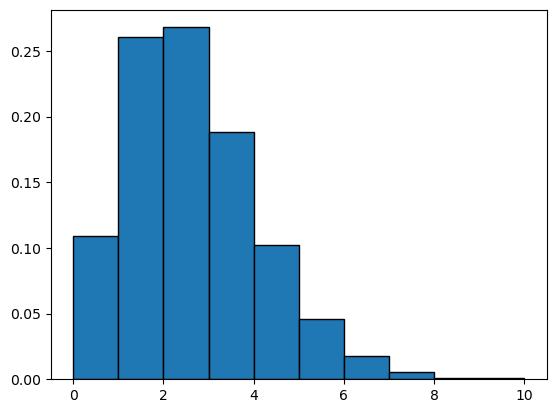

In [305]:
#?
x = poisson.rvs(mu=df['verschil'].mean(), size=len(df))
plt.hist(x, density=True, edgecolor='black')